In [10]:
import numpy as np
import pandas as pd
from os import path
import matplotlib.pyplot as plt
from tqdm import tqdm
import umap
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [2]:
DATA_DIR = "../../data"

In [3]:
chen_data = pd.read_csv(path.join(DATA_DIR, "chen/chen_data.csv"))
chen_data

,Antibody_ID,heavy,light,Y
0,12e8,EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...,DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...,0
1,15c8,EVQLQQSGAELVKPGASVKLSCTASGFNIKDTYMHWVKQKPEQGLE...,DIVLTQSPAIMSASLGERVTMTCTASSSVSSSNLHWYQQKPGSSPK...,0
2,1a0q,EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQGLE...,DIELTQSPSSLSASLGGKVTITCKASQDIKKYIGWYQHKPGKQPRL...,1
3,1a14,QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...,DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...,0
4,1a2y,QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKGLE...,DIVLTQSPASLSASVGETVTITCRASGNIHNYLAWYQQKQGKSPQL...,0
...,...,...,...,...
2404,6s5a,EVKLLESGGGLVQPGGSLKLSCAASGFDFSRYWMNWVRQAPGKGLE...,QAVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDHLF...,0
2405,6tyb,EVQLVQSGTEVKRPGESLTISCKTSGYSFSGTWISWVRQMPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQGISTYLAWYQQKPGKAPKL...,0
2406,6u1t,EVQLVESGGGLVKPGGSLKLSCAASGFTFSSYDMSWVRQTPEKRLE...,DIQMTQSPASQSASLGESVTITCLASQTIGTWLAWYQQKPGKSPQL...,0
2407,7fab,AVQLEQSGPGLVRPSQTLSLTCTVSGTSFDDYYWTWVRQPPGRGLE...,ASVLTQPPSVSGAPGQRVTISCTGSSSNIGAGHNVKWYQQLPGTAP...,0


# Load precomputed ANARCI matrix

In [4]:
heavy_df = pd.read_csv(path.join(DATA_DIR, "chen/abnumber/chen_heavy_chain_numbering.csv"))
light_df = pd.read_csv(path.join(DATA_DIR, "chen/abnumber/chen_light_chain_numbering.csv"))
heavy_df.head()

,Ab_ID,chain_type,species,1,2,3,3A,4,4A,5,...,119,120,121,122,123,124,125,126,127,128
0,12e8,H,mouse,E,V,Q,-,L,-,Q,...,G,Q,G,T,L,V,T,V,S,A
1,15c8,H,mouse,E,V,Q,-,L,-,Q,...,G,Q,G,T,T,L,T,V,S,S
2,1a0q,H,mouse,E,V,Q,-,L,-,Q,...,G,Q,G,T,T,L,T,V,S,S
3,1a14,H,mouse,Q,V,Q,-,L,-,Q,...,G,Q,G,T,T,V,T,V,-,-
4,1a2y,H,mouse,Q,V,Q,-,L,-,Q,...,G,Q,G,T,T,L,T,V,S,S


In [8]:
def anarci_similarity_matrix(anarci_df):
    pos_columns = [col for col in anarci_df.columns if col[0].isnumeric()]
    positions = anarci_df[pos_columns]
    tasks = [(row, positions) for i, row in positions.iterrows()]
    rows = tqdm(map(identity_task, tasks), total=len(tasks), position=0, leave=True)
    matrix = pd.DataFrame(rows)
    matrix.index = matrix.columns
    return matrix

def identity_task(task):
    seq, seqs = task
    return seqs.apply(all_position_identity, seq2=seq, axis=1).astype(np.float16)

def all_position_identity(seq1, seq2):
    return (seq1 == seq2).mean()

## Heavy

In [11]:
heavy_similarity = anarci_similarity_matrix(heavy_df)
heavy_similarity.head()

100%|██████████| 2407/2407 [21:19<00:00,  1.88it/s]


,0,1,2,3,4,5,6,7,8,9,...,2397,2398,2399,2400,2401,2402,2403,2404,2405,2406
0,1.000000,0.857910,0.784180,0.769531,0.656738,0.759766,0.857910,0.686035,0.686035,0.818848,...,0.686035,0.691406,0.745117,0.686035,0.691406,0.710938,0.696289,0.720703,0.691406,0.691406
1,0.857910,1.000000,0.818848,0.789062,0.676270,0.774414,0.887207,0.681152,0.681152,0.857910,...,0.710938,0.696289,0.750000,0.696289,0.706055,0.686035,0.671387,0.715820,0.691406,0.691406
2,0.784180,0.818848,1.000000,0.818848,0.676270,0.813965,0.789062,0.725586,0.725586,0.793945,...,0.715820,0.681152,0.750000,0.691406,0.706055,0.676270,0.676270,0.696289,0.637207,0.666504
3,0.769531,0.789062,0.818848,1.000000,0.656738,0.808594,0.754883,0.701172,0.701172,0.793945,...,0.676270,0.701172,0.759766,0.715820,0.740234,0.671387,0.686035,0.691406,0.656738,0.691406
4,0.656738,0.676270,0.676270,0.656738,1.000000,0.666504,0.666504,0.686035,0.686035,0.676270,...,0.696289,0.725586,0.661621,0.656738,0.656738,0.696289,0.651855,0.706055,0.720703,0.706055


In [ ]:
np.savetxt(path.join(DATA_DIR, "chen/distances/anarci_similarity_heavy.csv"), heavy_similarity, delimiter=';')

In [12]:
def fit_umap(df, n_components=2, random_state=0, **kwargs):
    reducer = umap.UMAP(n_components=n_components, random_state=random_state, metric='precomputed', **kwargs)
    embedding = reducer.fit_transform(df)
    return reducer, pd.DataFrame(embedding, columns=[f'UMAP-{i+1}' for i in range(n_components)], index=df.index)

In [13]:
vh_reducer, vh_umap = fit_umap(1-heavy_similarity, n_neighbors=10)
vh_umap.head()

/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/umap/umap_.py:1736: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "


,UMAP-1,UMAP-2
0,-22.509872,-22.803427
1,-22.868769,-22.867229
2,-4.697710,1.088842
3,-5.369852,1.057855
4,6.806503,16.705387


In [14]:
def agglomerative_clustering(distance, linkage='complete', **kwargs):
    clusters = AgglomerativeClustering(linkage=linkage, affinity='precomputed', **kwargs).fit(distance).labels_
    return pd.Series(clusters+1, distance.index)

In [22]:
vh_clusters = agglomerative_clustering(
    1-heavy_similarity, 
    n_clusters=None, 
    distance_threshold=0.1, 
    linkage='single'
)

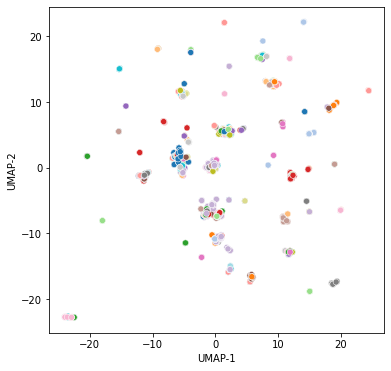

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.scatterplot(
    data=vh_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue=vh_clusters,
    palette='tab20',
    ax=ax,
    legend=False,
)

In [24]:
vh_clusters.max()

637

## Light

In [25]:
light_similarity = anarci_similarity_matrix(light_df)
light_similarity.head()

100%|██████████| 2409/2409 [20:59<00:00,  1.91it/s]


,0,1,2,3,4,5,6,7,8,9,...,2399,2400,2401,2402,2403,2404,2405,2406,2407,2408
0,1.000000,0.695801,0.623047,0.630371,0.645020,0.586914,0.703125,0.652344,0.652344,0.703125,...,0.347900,0.572266,0.558105,0.550781,0.709961,0.500000,0.384033,0.688477,0.528809,0.565430
1,0.695801,1.000000,0.681152,0.681152,0.709961,0.630371,0.637695,0.630371,0.630371,0.637695,...,0.333252,0.608887,0.594238,0.565430,0.681152,0.528809,0.434814,0.717285,0.586914,0.572266
2,0.623047,0.681152,1.000000,0.703125,0.709961,0.565430,0.623047,0.565430,0.565430,0.623047,...,0.333252,0.528809,0.550781,0.550781,0.681152,0.500000,0.434814,0.703125,0.514648,0.550781
3,0.630371,0.681152,0.703125,1.000000,0.666504,0.565430,0.572266,0.608887,0.608887,0.572266,...,0.311523,0.572266,0.558105,0.521973,0.673828,0.514648,0.413086,0.652344,0.507324,0.536133
4,0.645020,0.709961,0.709961,0.666504,1.000000,0.594238,0.623047,0.594238,0.594238,0.623047,...,0.347900,0.558105,0.543457,0.543457,0.703125,0.543457,0.434814,0.818848,0.521973,0.565430


In [ ]:
np.savetxt(path.join(DATA_DIR, "chen/distances/anarci_similarity_light.csv"), light_similarity, delimiter=';')

In [26]:
vl_reducer, vl_umap = fit_umap(1-light_similarity, n_neighbors=10)
vl_umap.head()

/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/umap/umap_.py:1736: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "


,UMAP-1,UMAP-2
0,8.604904,8.193730
1,-8.803350,-5.699873
2,-10.007228,8.364964
3,-13.026506,15.494286
4,-5.814436,-6.331754


In [45]:
def plot_clustering(similarity_mat, n_clusters, dist_thresh, umap_coords, linkage="single"):
    clusters = agglomerative_clustering(
        1-similarity_mat, 
        n_clusters=n_clusters, 
        distance_threshold=dist_thresh, 
        linkage=linkage
    )
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.scatterplot(
        data=umap_coords,
        x='UMAP-1',
        y='UMAP-2',
        hue=clusters,
        palette='tab20',
        ax=ax,
        legend=False,
    )
    fig.show()
    return clusters

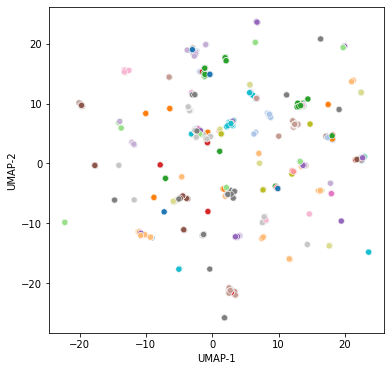

In [46]:
vl_clusters = plot_clustering(light_similarity, None, 0.1, vl_umap)

In [47]:
vl_clusters.max()

363

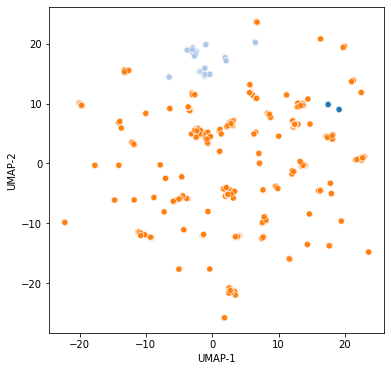

In [48]:
vl_clusters = plot_clustering(light_similarity, 3, None, vl_umap)

In [39]:
vl_clusters.value_counts()

3    2145
2     241
1      23
dtype: int64